# EDA of HR data
Dataset was created using the following [notebook](https://github.com/MarcinStolarczyk01/WSEI-ML_and_AI_Programming_Libraries/blob/master/lab1%262/data/prepare_dataset.ipynb)


In [2]:
!pip install -q pandas matplotlib scikit-learn seaborn

### Load data

In [3]:
import pandas as pd

df = pd.read_csv("data/hr_data_silver.csv")

## Data structure analysis

In [4]:
# jakie są wymiary, jakie są typy zmiennych?
print(f"{10*'='}Features{10*'='}\n {df.columns}")
print(f"\n\n{10*'='}Data types{10*'='}\n{df.dtypes}")
print(f"\n\n{10*'='}Missing values{10*'='}")
df.isnull().sum()

==========Features==========
 Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


==========Data types==========
Age                          int64
Attrition                   object
BusinessTravel              object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYea

Age                        0
Attrition                  0
BusinessTravel             0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

## Descriptive statistics & Outliers detection

In [5]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,2.063898,65061.702419,2.693291,15.210634,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,1.106115,47142.310175,2.497832,3.663007,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83790.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


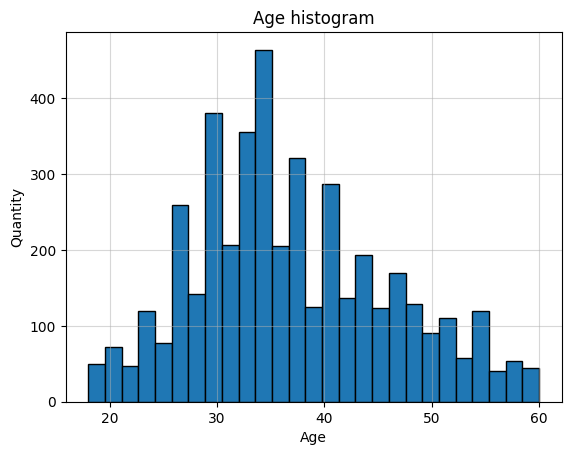

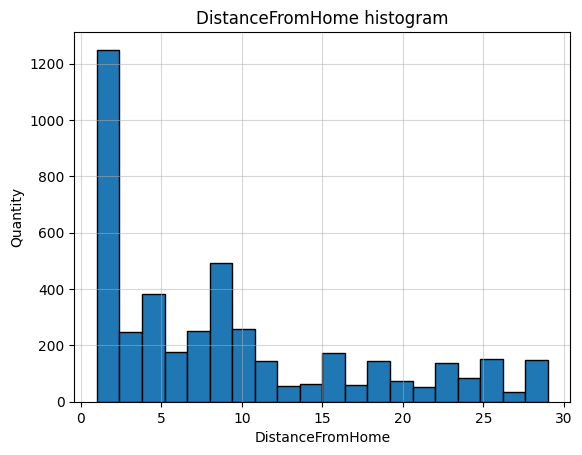

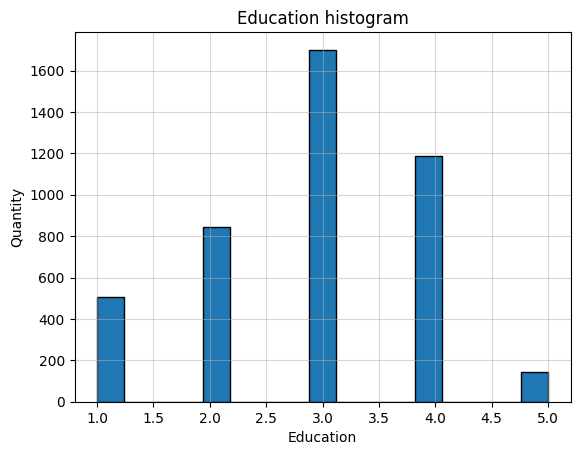

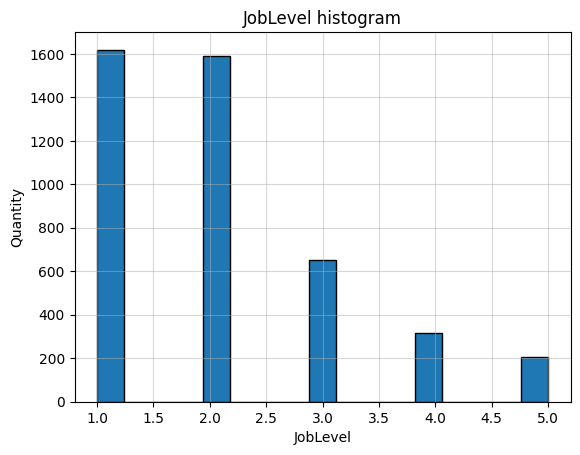

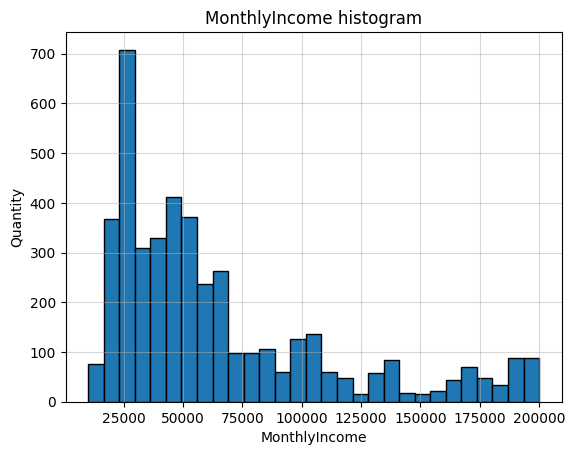

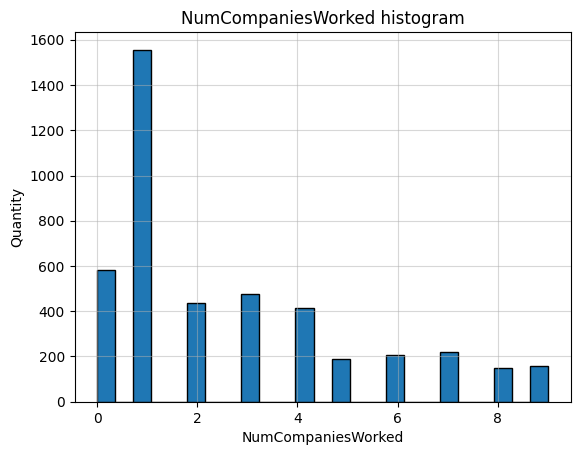

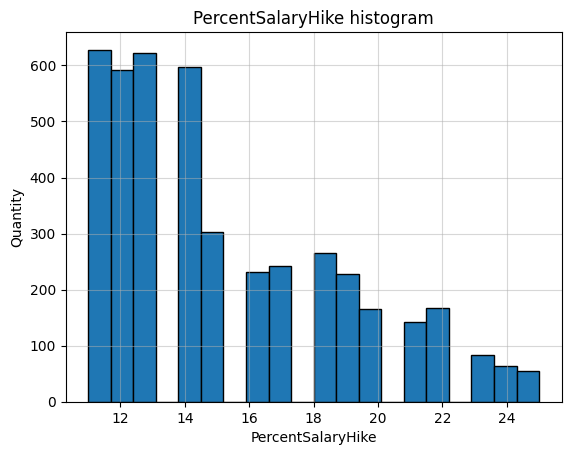

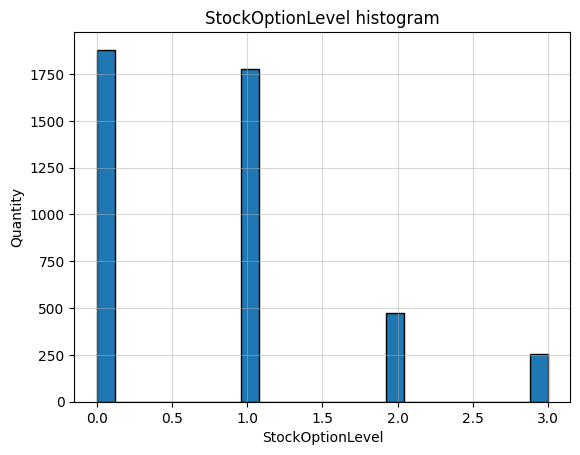

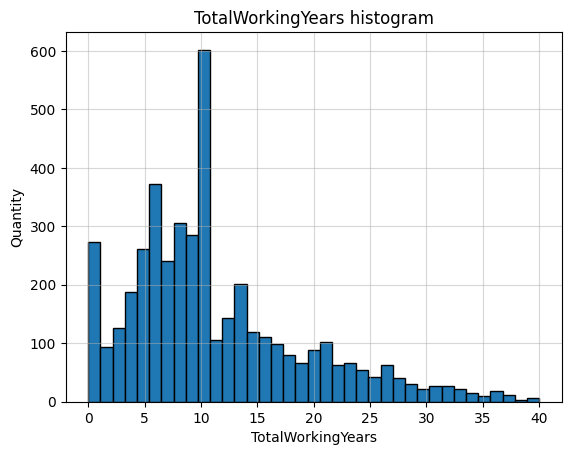

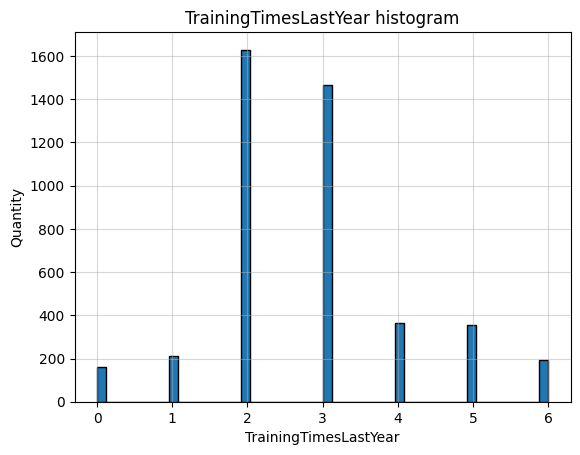

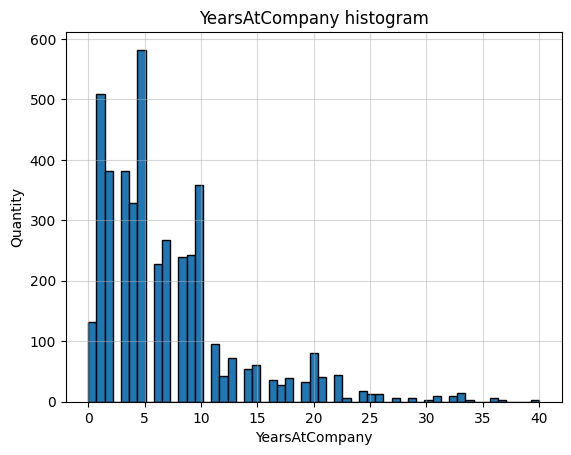

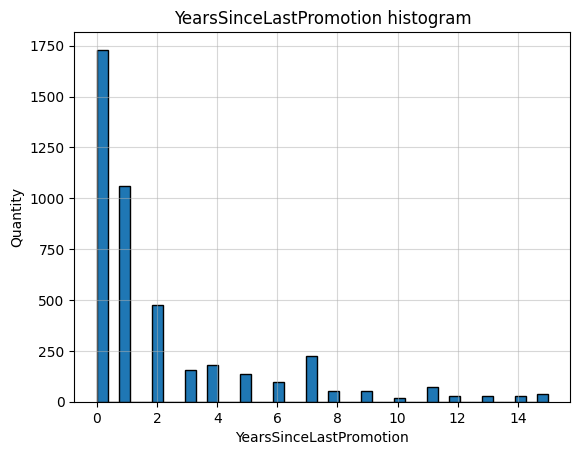

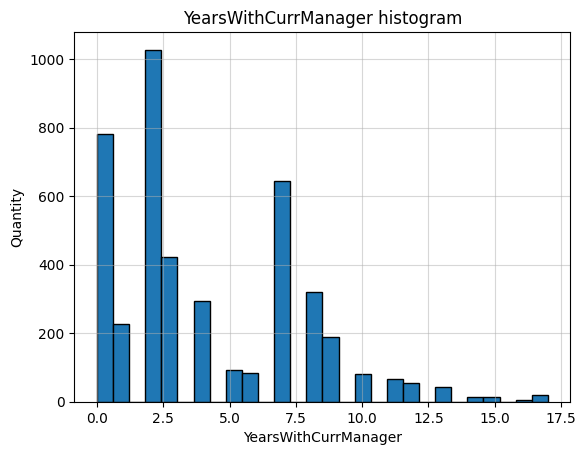

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Freedman-Diaconis rule to find number of bins
names = df.select_dtypes(include='number').columns
features = [df[n].values for n in names]

for name, feature in zip(names, features):
    q25, q75 = np.percentile(feature, [25, 75])
    iqr = q75 - q25
    bin_width = 2 * iqr / len(feature) ** (1/3)
    bins = int(np.ceil((feature.max() - feature.min()) / bin_width))

    plt.hist(feature, bins=bins, edgecolor="black")
    plt.title(f"{name} histogram")
    plt.xlabel(f"{name}")
    plt.ylabel("Quantity")
    plt.grid(True, alpha=0.5)
    plt.show()

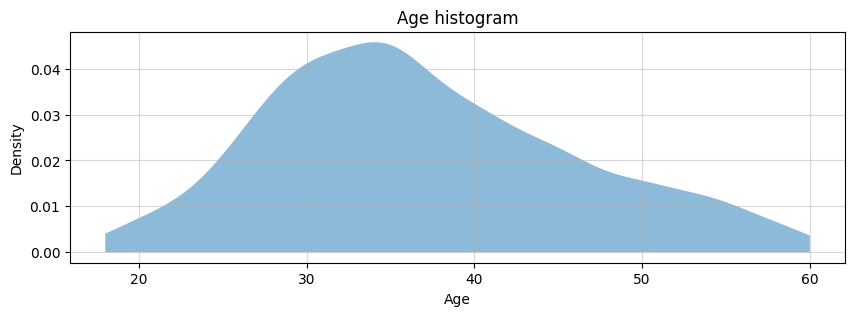

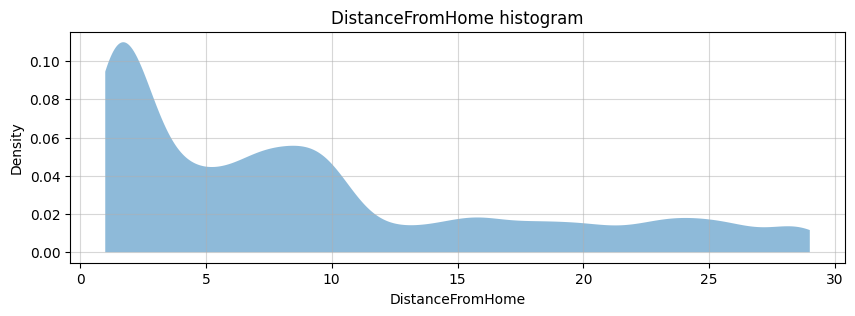

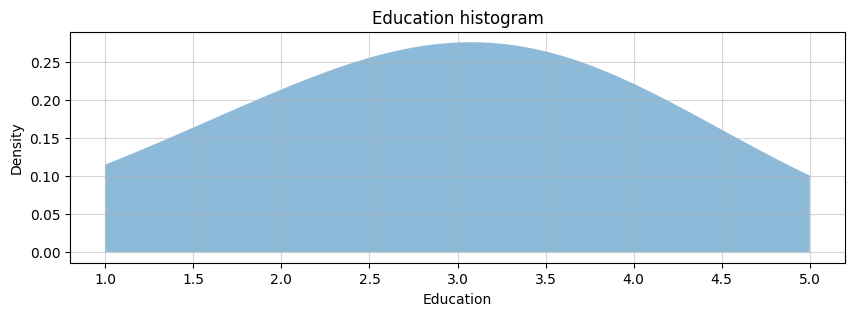

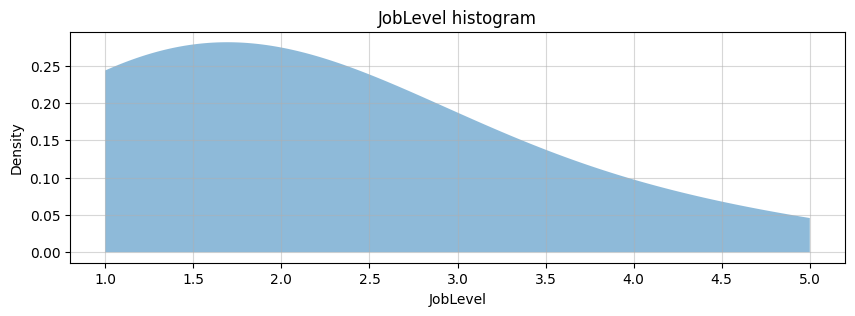

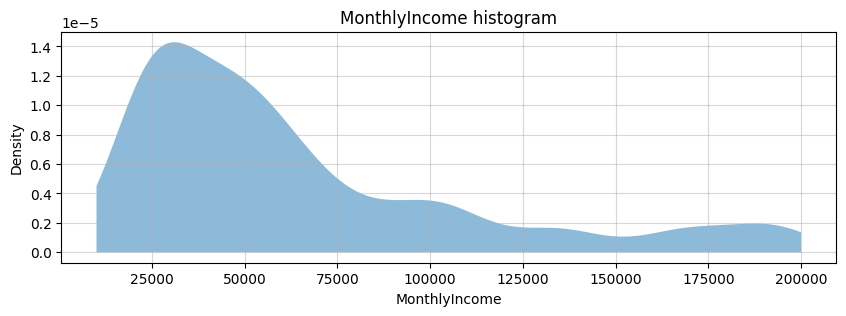

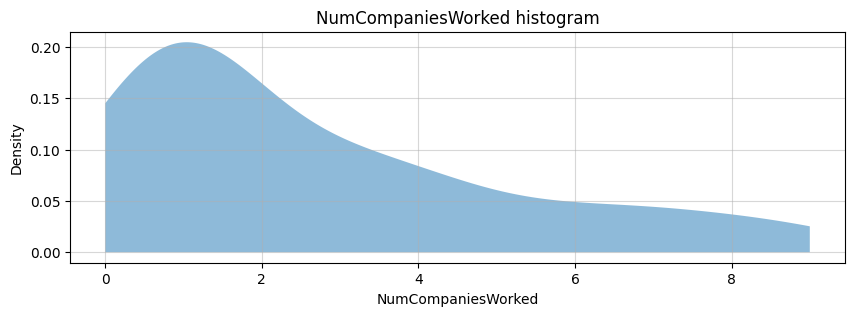

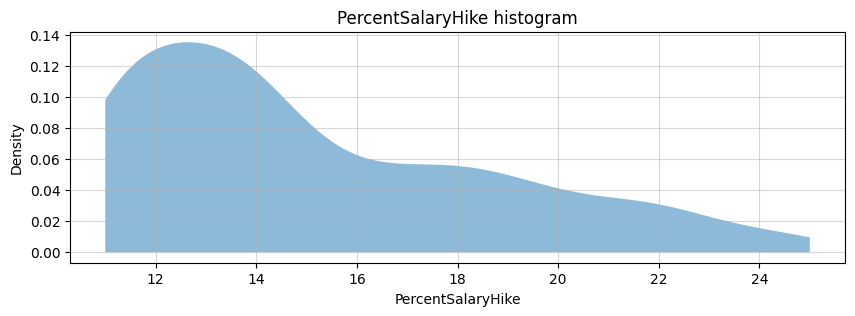

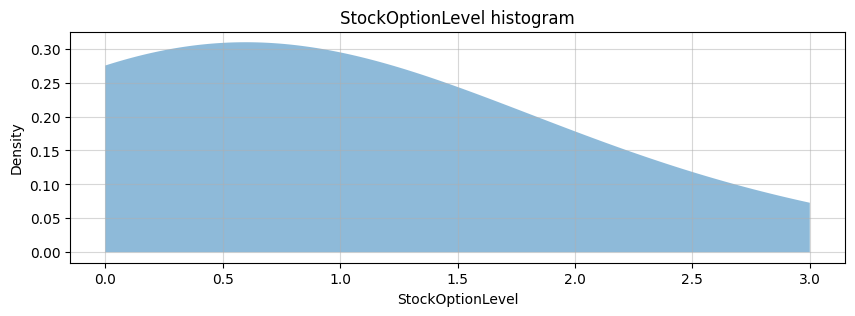

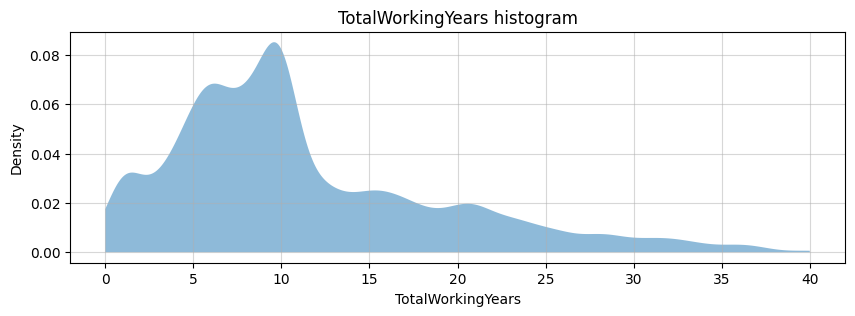

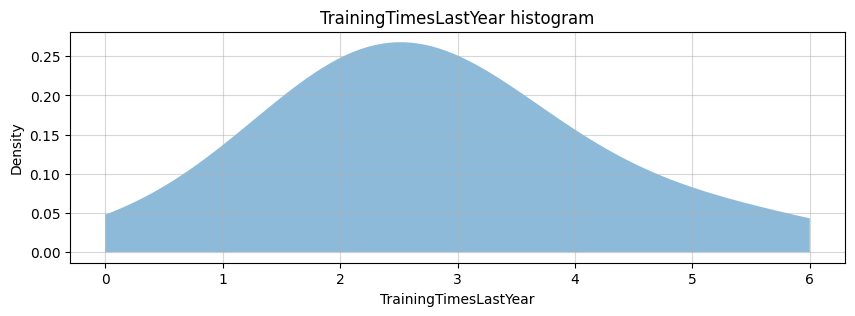

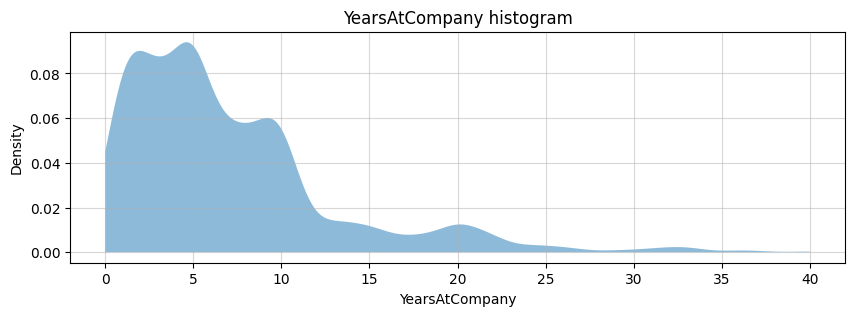

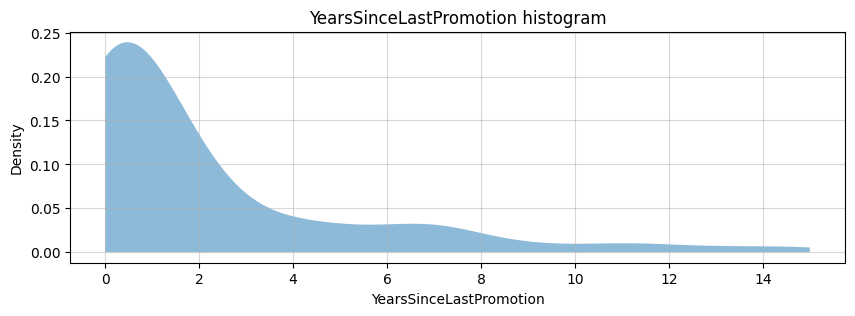

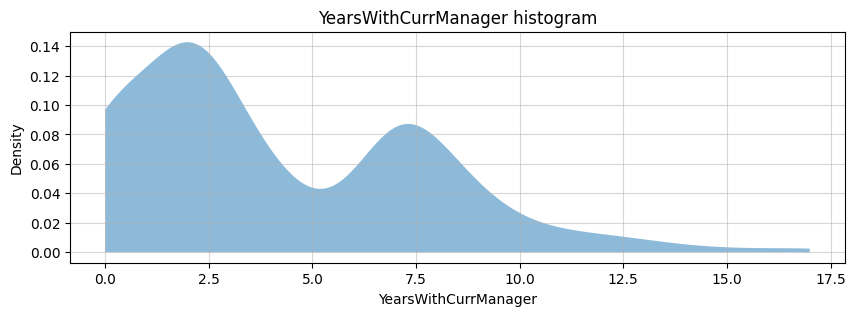

In [13]:
# Kernel Density Estimation (KDE)
from sklearn.neighbors import KernelDensity

bandwidths = [2, 1, 1, 1, 10000, 1, 1, 1, 1, 1, 1, 1, 1]

for name, feature, bandwidth in zip(names, features, bandwidths):
    x_values = np.linspace(feature.min(), feature.max(), num=1000)[:, np.newaxis]
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(feature[:, None])
    log_dens = kde.score_samples(x_values)

    plt.figure(figsize=[10,3])
    plt.fill_between(x_values[:, 0], np.exp(log_dens), alpha=0.5, label="KDE (Gaussian kernel)")
   
    plt.title(f"{name} histogram")
    plt.xlabel(f"{name}")
    plt.ylabel("Density")
    plt.grid(True, alpha=0.5)
    plt.show()

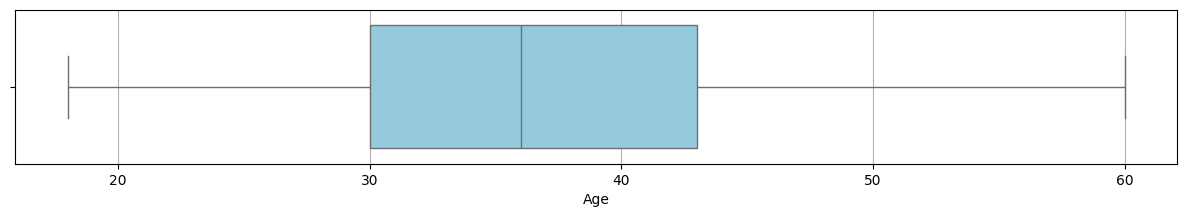

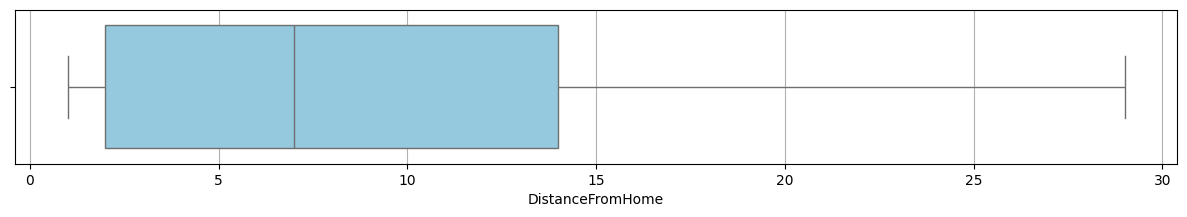

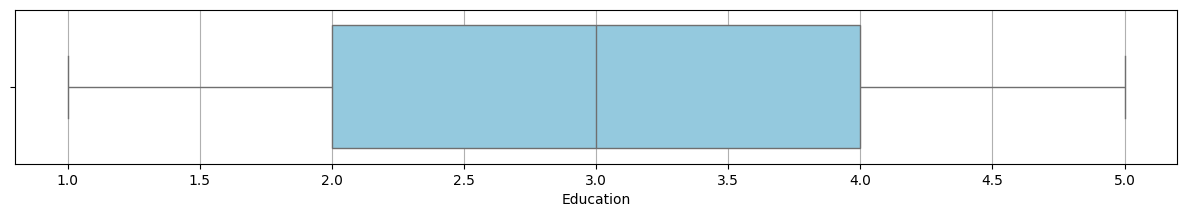

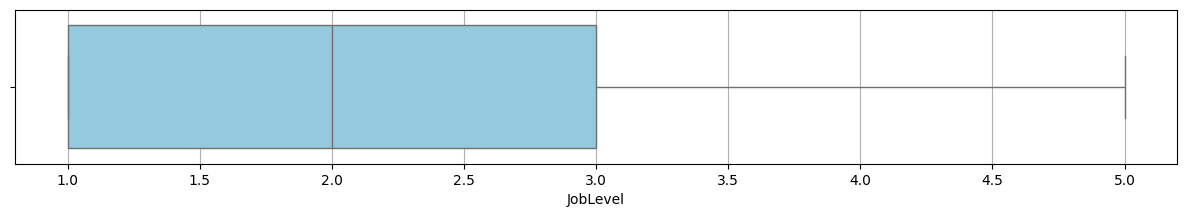

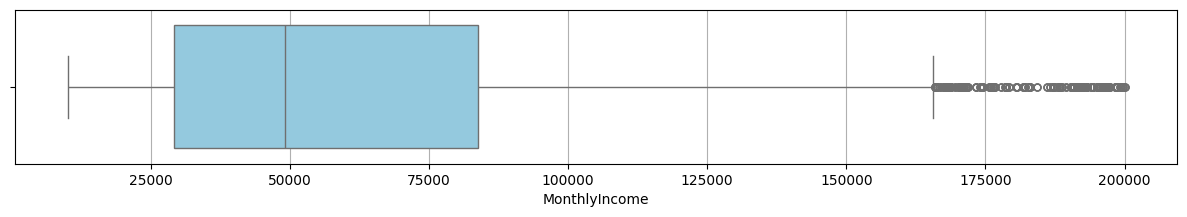

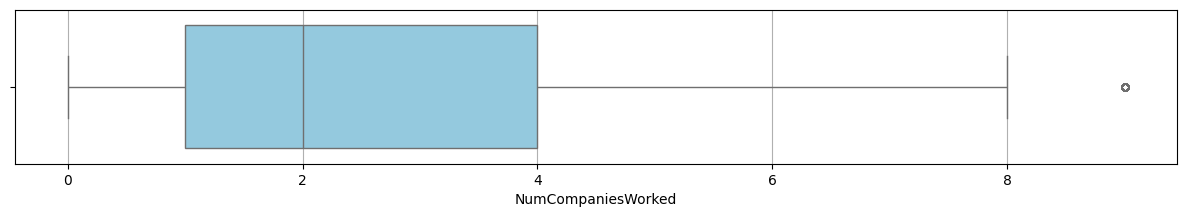

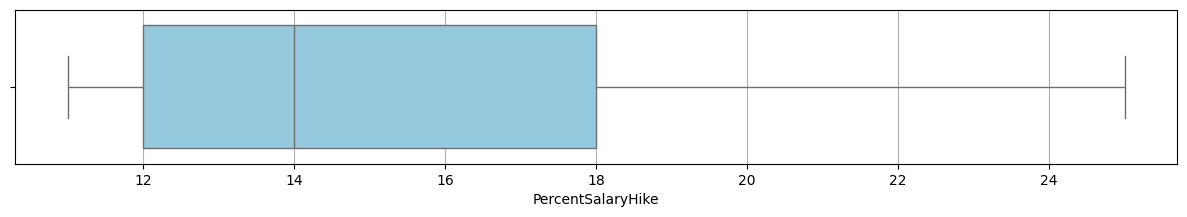

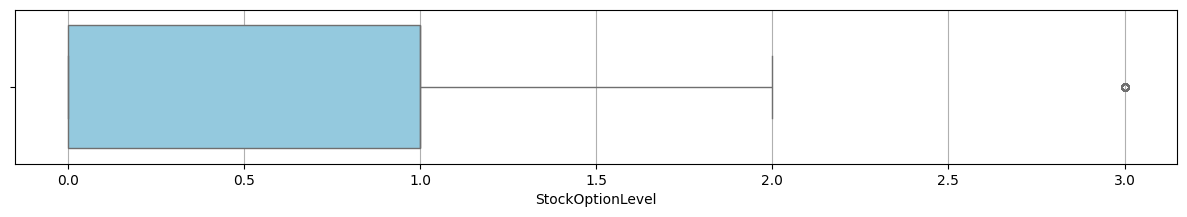

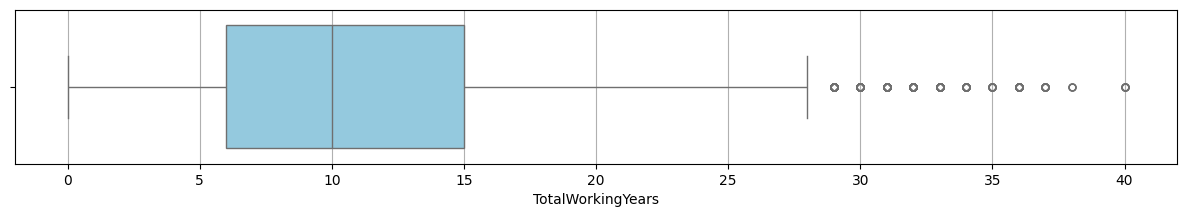

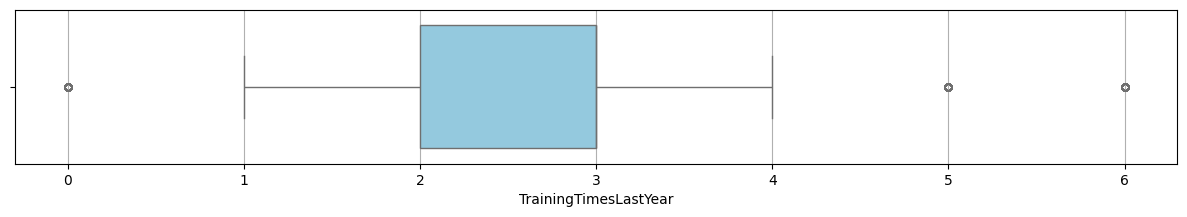

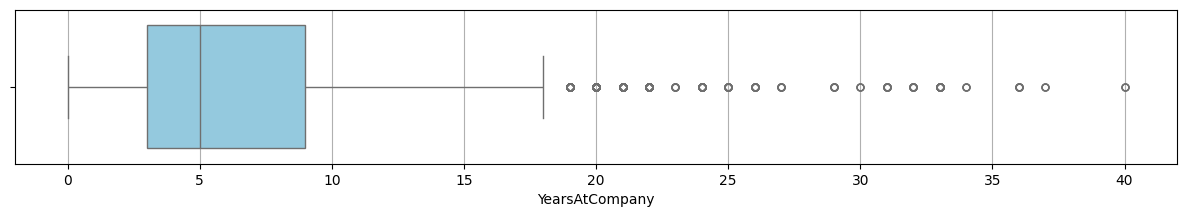

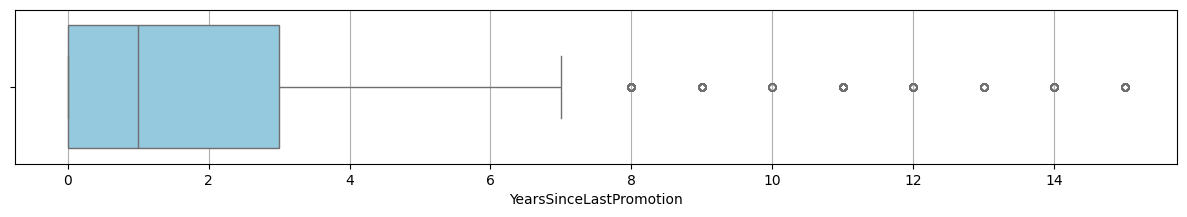

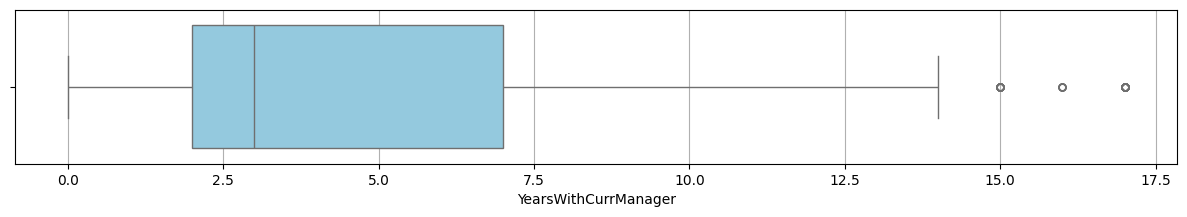

In [10]:
# box plots
import seaborn as sns

for name, feature in zip(names, features):
    plt.figure(figsize=[15, 2])
    sns.boxplot(feature, orient='h', color='skyblue', fliersize=5)
    plt.xlabel(f"{name}")
    plt.grid(True, axis='x')
    plt.show()

## Corelation analysis

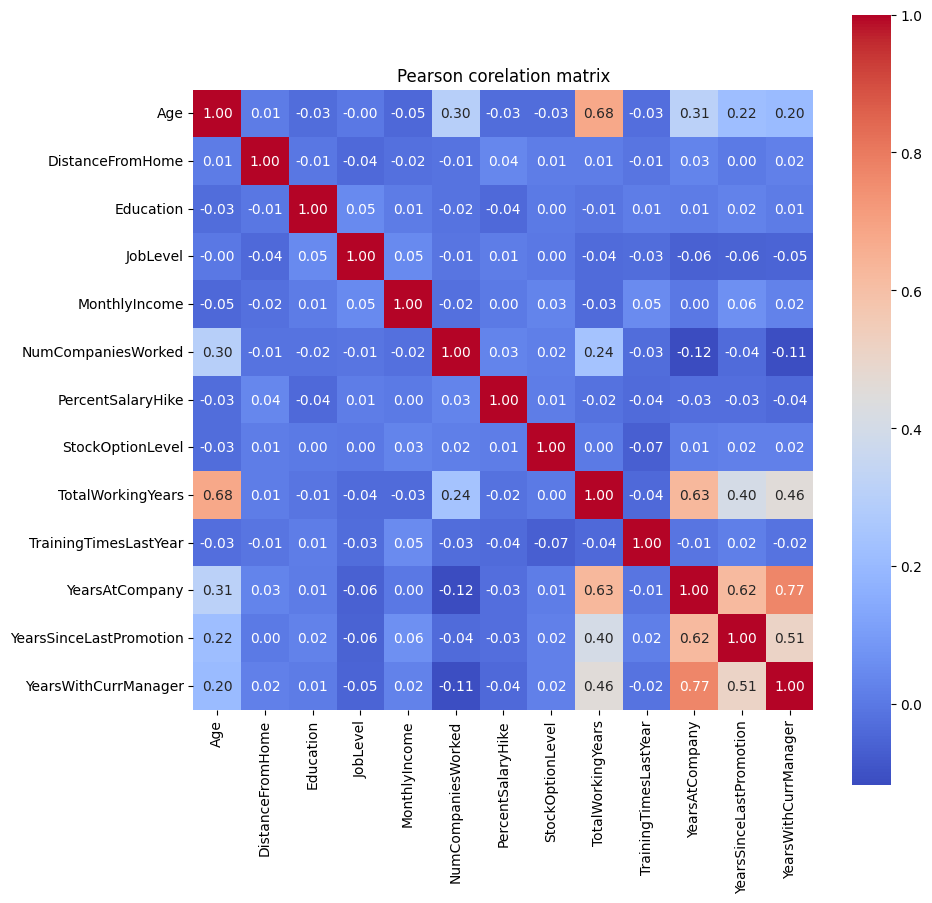

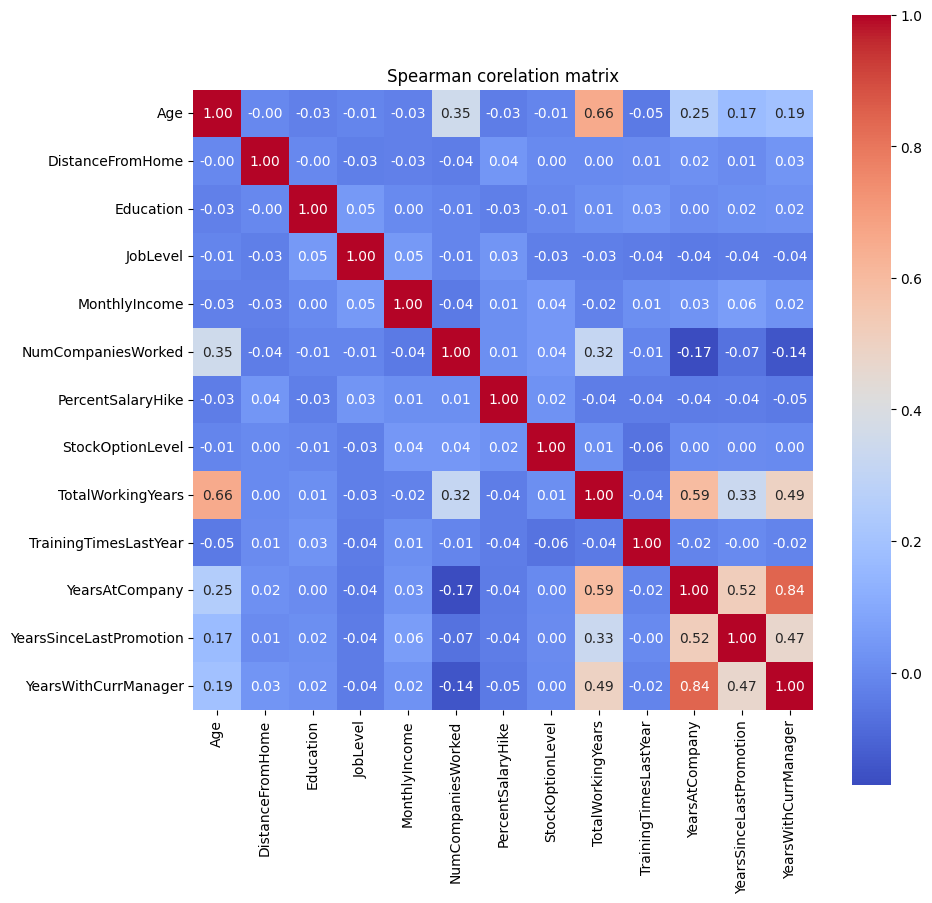

In [22]:
import seaborn as sns

# Pearson corelation matrix
pearson = df[names].corr('pearson')
# Spearman corelation
spearman = df[names].corr('spearman')


plt.figure(figsize=[10, 10])
plt.title("Pearson corelation matrix")
sns.heatmap(pearson, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

plt.figure(figsize=[10, 10])
plt.title("Spearman corelation matrix")
sns.heatmap(spearman, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

### Observations

**Very high corelations:**\
p=0.84 YearsAtCompany vs YearsWithCurrManager

**High corelations:**\
p=0.66 Age vs TotalWorkingYears

**Moderate corelations:**\
p=0.59 YearsAtCompany vs TotalWorkingYears\
p=0.52 YearsAtCompany vs YearsSinceLastPromotion\
p=0.49 TotalWorkingYears vs YearsWithCurrentManager


## Age vs salary

In [33]:
# Salary high = salary > median
# Salary low = salary < median

salary_high = df.MonthlyIncome > df.MonthlyIncome.median()
salary_level = salary_high.map({True: "high", False: "low"})

df["SalaryLevel"] = salary_level

/tmp/ipykernel_44596/777372778.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="SalaryLevel", y="Age", palette="Set1", inner="quartile", cut=0)


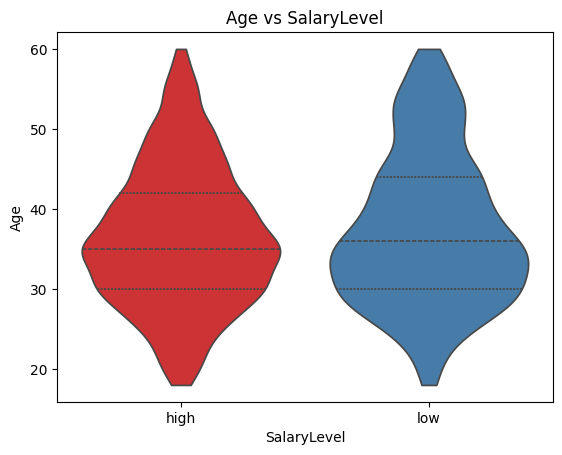

In [40]:
sns.violinplot(data=df, x="SalaryLevel", y="Age", palette="Set1", inner="quartile", cut=0)
plt.title("Age vs SalaryLevel")
plt.xlabel("SalaryLevel")
plt.ylabel("Age")
plt.show()

## JobLevel vs (Education vs Salary)

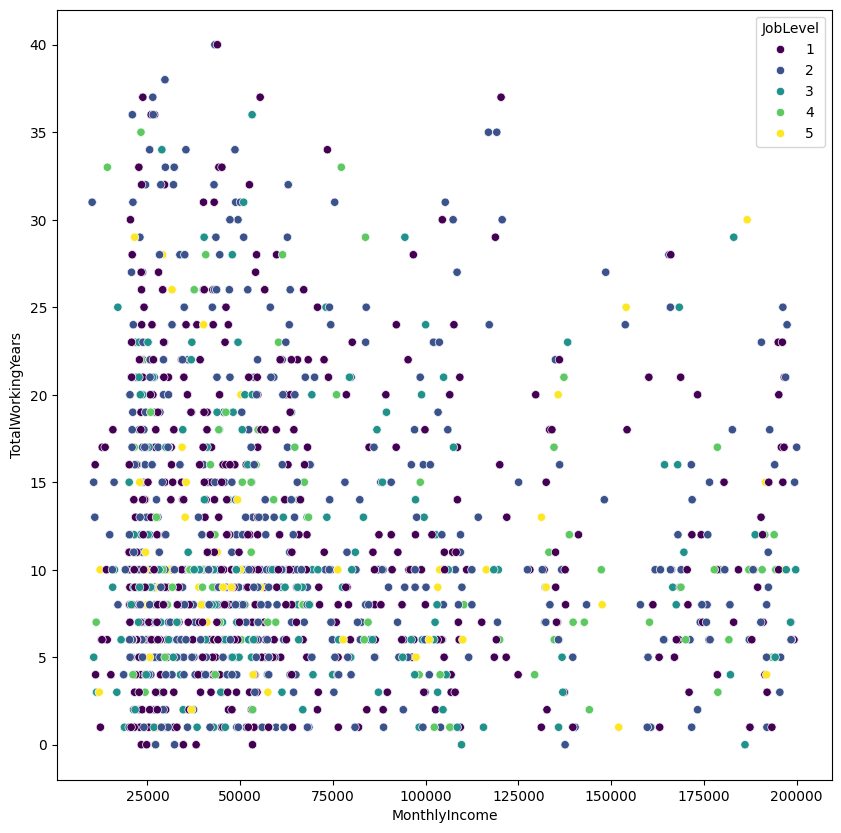

In [52]:

plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="MonthlyIncome", y="TotalWorkingYears", hue="JobLevel", palette="viridis", edgecolor="white")

plt.show()